In [33]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
import math

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [34]:
df = pd.read_csv('C:\\Users\\Administrador\\Desktop\\Data Scientist\\Data Science\\Proyecto\\GitHub\\Proyecto_DataScience_Coder\\data\\BTC_Data_final.csv')
print(df.dtypes)
df['Date']=pd.to_datetime(df['Date'])
print(df['Date'].dtypes)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

Date                       object
priceUSD                  float64
size                      float64
sentbyaddress               int64
transactions                int64
mining_profitability      float64
sentinusd                 float64
transactionfees           float64
median_transaction_fee    float64
confirmationtime          float64
marketcap                   int64
transactionvalue          float64
mediantransactionvalue    float64
tweets                      int64
google_trends             float64
fee_to_reward             float64
activeaddresses             int64
top100cap                 float64
dtype: object
datetime64[ns]


**INTRODUCCIÓN**

Bitcoin vio su nacimiento en el año 2009, y hasta la actualidad se desconoce la identidad real de su creador, a quien se le atribuye el seudónimo de Satoshi Nakamoto pudiendo ser un individuo o un grupo de personas.

Bitcoin es una moneda virtual o un medio de intercambio electrónico que sirve para adquirir productos y servicios como cualquier otra moneda. La diferencia con el resto de las monedas "FIAT" se da en que esta moneda digital es descentralizada, es decir que no existe una autoridad o ente de control que sea responsable de su emisión y registro de sus movimientos.

Por tal motivo, el precio de este activo se regula en el propio mercado de compra-venta, donde los oferentes y compradores emiten órdenes de venta y órdenes de compra estableciendo precios de entrada o salida al activo.

En los últimos años, se ha visto un creciente interés por parte de grandes empresas en aceptar Bitcoin como forma de pago, o bien resguardar parte de su patrimonio en este activo; esto ha generado que se dispare su precio llegando a tocar casi los usd 70.000 en noviembre de 2021.

**GRÁFICOS Y ANÁLISIS GENERALES SOBRE BITCOIN**

Text(0.5, 1.0, 'Evolucion historica de transacciones con BTC')

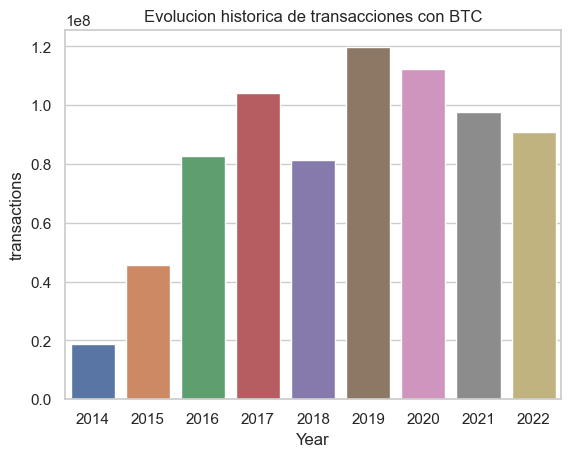

In [35]:
df_tran = df.groupby(['Year'])['transactions'].sum().reset_index()
df_tran.head(10)

sns.set_theme(style="whitegrid")

ax = sns.barplot(x="Year", y="transactions", data=df_tran)
ax.set_title('Evolucion historica de transacciones con BTC')

En este caso se analiza la evolución histórica de transacciones realizadas en la blockchain de Bitcoin.

In [36]:
df_tran.head(10)

,Year,transactions
0,2014,18951966
1,2015,45618870
2,2016,82571772
3,2017,104010023
4,2018,81340729
5,2019,119726948
6,2020,112497226
7,2021,97743767
8,2022,90826733


Se puede ver que hasta el año 2019 se dio un crecimiento grande en este índice, y en 2020 ha comenzado un retroceso en la cantidad de transacciones anuales, lo cual puede responder a la inestabilidad en el precio del activo.

**HEATMAP de precios de Bitcoin**

El siguiente HeatMap muestra los precios máximos que ha tenido Bitcoin en cada mes de cada año desde su creación.

C:\Users\Administrador\AppData\Local\Temp\ipykernel_16380\1157766332.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_price_order1 = df_price_order.pivot("Month", "Year", "priceUSD")


<AxesSubplot: xlabel='Year', ylabel='Month'>

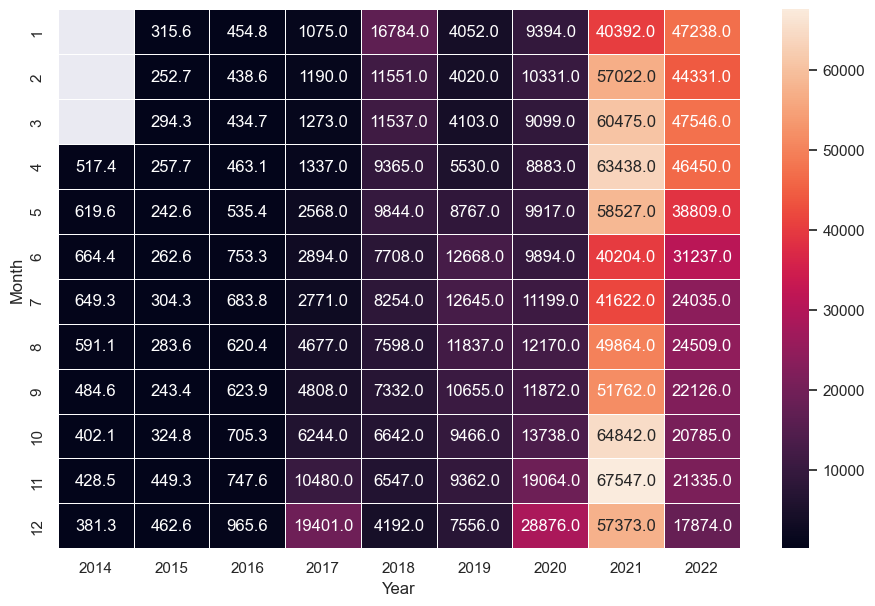

In [37]:
df_price_order = df.groupby(['Year', 'Month'])['priceUSD'].max().reset_index()

sns.set_theme()

df_price_order1 = df_price_order.pivot("Month", "Year", "priceUSD")

f, ax = plt.subplots(figsize=(11, 7))
sns.heatmap(df_price_order1, annot=True, fmt=".1f", linewidths=.5, ax=ax)

Podemos ver que su precio más alto fue visto en el mes de noviembre de 2021, cuando alcanzó el monto de USD 67.547

**TRANSACCIONES ENVIADAS DE BTC COTIZADAS EN USD**

<AxesSubplot: xlabel='Year', ylabel='sentin_Musd'>

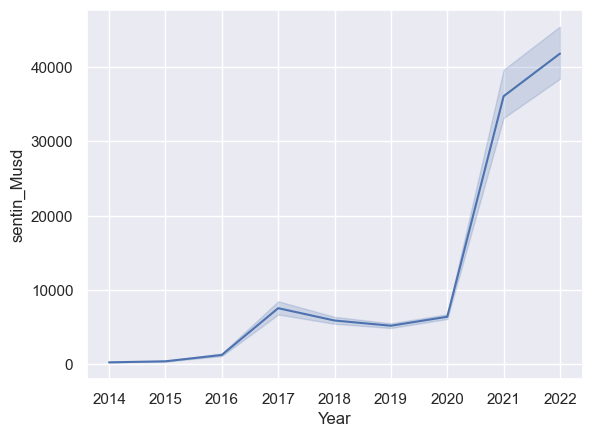

In [38]:
df['sentin_Musd'] = df['sentinusd'] / 1000000
df.head(3)

sns.set_theme(style="darkgrid")
sns.lineplot(x="Year", y="sentin_Musd", data=df)

En este grafico se analiza la cantidad de transacciones enviadas en BTC cotizadas en USD.

Es impactante como el valor de las transacciones han ido creciendo año a año, con una tendencia clara a seguir en aumento.

**HIPÓTESIS 1**

La volatibilidad en el precio de Bitcoin ha sido sumamente elevada a lo largo de los años, lo que afecta directamente a la capitalización de mercado de este activo.

En el siguiente gráfico, se contrastará la evolución del market cap de Bitcoin, para demostrar como la evolución de este sigue la misma tendencia que la evolución del precio del activo.

Text(0.5, 1.0, 'Grafico precio BTC')

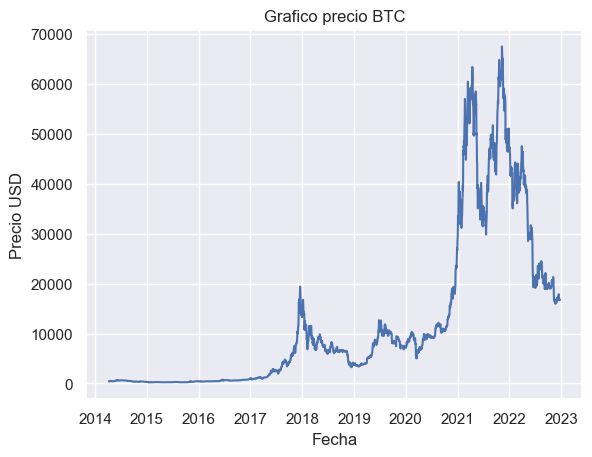

In [39]:
fig, ax = plt.subplots()
x = df.Date
y = df.priceUSD
ax.plot(x, y, label='Precio BTC')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio USD')
ax.set_title('Grafico precio BTC')

Text(0.5, 1.0, 'Capitalización de mercado de BTC expresada en USD Miles de Millones')

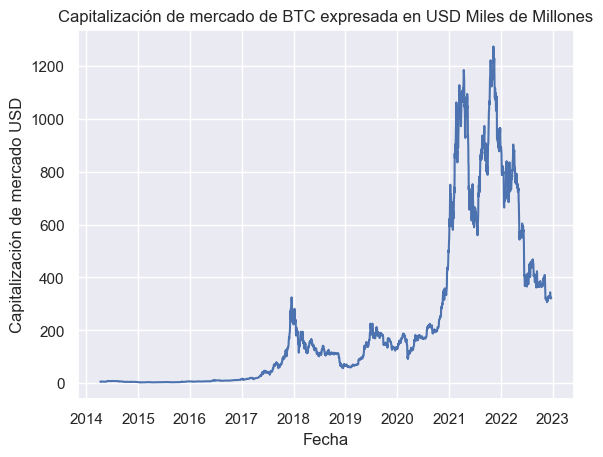

In [40]:
df['marketcap_en_MM'] = df.apply(lambda row: row.marketcap / 1000000000, axis=1)
fig, ax = plt.subplots()
x = df.Date
y = df.marketcap_en_MM
ax.plot(x, y, label='Capitalización de mercado de BTC expresada en USD Miles de Millones')
ax.set_xlabel('Fecha')
ax.set_ylabel('Capitalización de mercado USD')
ax.set_title('Capitalización de mercado de BTC expresada en USD Miles de Millones')

**CONCLUSION 1**

En el gráfico podemos ver como la tendencia de la capitalización de mercado respeta los mismos parametros que los del gráfico de la evolución del precio de BTC.

**HIPÓTESIS 2**

Como segunda hipótesis a plantear, surge la idea de que el precio de Bitcoin debería influir de forma directa en la cantidad de direcciones activas en determinados períodos de tiempo. Se plantea esto dado que ante precios mayores, aquellos que sean poseedores de wallets que contengan BTC tendrán mayores incentivos para realizar transacciones de compra-venta.
Para analizar este fenómeno se realizan los siguientes cálculos.

In [41]:
correlation = df['priceUSD'].corr(df['activeaddresses'])

print("La correlación entre el precio de Bitcoin y la cantidad de direcciones activas es:", correlation)

La correlación entre el precio de Bitcoin y la cantidad de direcciones activas es: 0.6654127601918235


**CONCLUSIÓN 2**

Al realizar el cálculo del indice de correlación entre las "active adresseses" y el precio de BTC se nos muestra una fuerte correlación positiva entre estos factores, ya que el resultado de 0.665 se considera cercano a 1.

**Abstracto, motivación y audiencia**

Este proyecto de data science tiene como objetivo analizar la evolución histórica del precio de Bitcoin utilizando un conjunto de datos que incluye información sobre la fecha, el precio en USD, el número de transacciones, la capitalización de mercado, la presencia de la tematica Bitcoin en redes sociales y otros indicadores relevantes.

La hipótesis principal de este proyecto es que el precio de Bitcoin ha sido influenciado por una variedad de factores, incluyendo la adopción por parte de grandes empresas, la regulación gubernamental, la oferta y la demanda del mercado y la actividad en las redes sociales. Se espera que este análisis proporcione una mejor comprensión de cómo estos factores han afectado al precio de Bitcoin a lo largo del tiempo y cómo podrían seguir influyendo en el futuro.

La audiencia principal de este proyecto es cualquier persona interesada en Bitcoin y en las criptomonedas en general, incluyendo inversores, entusiastas y empresas que podrían estar considerando la adopción de esta tecnología. Además, los resultados de este análisis podrían ser útiles para reguladores y responsables políticos que buscan comprender mejor los factores que influyen en el precio de Bitcoin y cómo podrían afectar la economía en general.

**Preguntas/Hipótesis que queremos resolver mediante el análisis de datos**

Algunas de las hipotesis que se buscan resolver con el análisis son las planteadas anteriormente en el archivo ProyectoDS_ParteI. Las mismas fueron las siguientes:

- La volatibilidad en el precio de Bitcoin ha sido sumamente elevada a lo largo de los años, lo que afecta directamente a la capitalización de mercado de este activo.

Para demostrar esto se realizó el siguiente gráfico

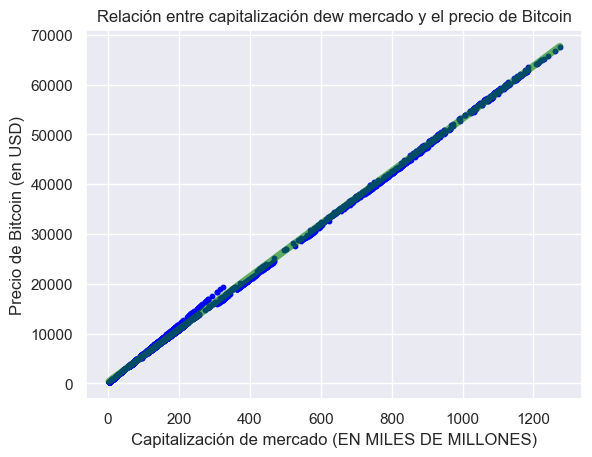

In [42]:
df['marketcap_en_MM'] = df.apply(lambda row: row.marketcap / 1000000000, axis=1)
plt.scatter(df['marketcap_en_MM'], df['priceUSD'], s=10, c='blue')

m, b = np.polyfit(df['marketcap_en_MM'], df['priceUSD'], 1)
x = np.linspace(min(df['marketcap_en_MM']), max(df['marketcap_en_MM']), 100)
y = m * x + b

plt.plot(x, y, color='green', linewidth=5, alpha=0.60)

plt.title('Relación entre capitalización de mercado y el precio de Bitcoin')
plt.xlabel('Capitalización de mercado (EN MILES DE MILLONES)')
plt.ylabel('Precio de Bitcoin (en USD)')
plt.grid(True)
plt.show()

**Análisis Exploratorio de Datos (EDA)**

En primer lugar para realizar el análisis exploratorio de datos es conveniente comprobar que no existan valores nulos, y a su vez obtener que tipos de datos hay en cada columna.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    3180 non-null   datetime64[ns]
 1   priceUSD                3180 non-null   float64       
 2   size                    3180 non-null   float64       
 3   sentbyaddress           3180 non-null   int64         
 4   transactions            3180 non-null   int64         
 5   mining_profitability    3180 non-null   float64       
 6   sentinusd               3180 non-null   float64       
 7   transactionfees         3180 non-null   float64       
 8   median_transaction_fee  3180 non-null   float64       
 9   confirmationtime        3180 non-null   float64       
 10  marketcap               3180 non-null   int64         
 11  transactionvalue        3180 non-null   float64       
 12  mediantransactionvalue  3180 non-null   float64 

Por último se muestra la correlación entre dos variables del data set, en este caso comparando el precio de Bitcoin con la cantidad de direcciones activas; y una comparación adicional contra la cantidad de tweets sobre la tematica.

In [44]:
correlation = df['priceUSD'].corr(df['activeaddresses'])

print("La correlación entre el precio de Bitcoin y la cantidad de direcciones activas es:", correlation)

correlationtweets = df['priceUSD'].corr(df['tweets'])
print("La correlación entre el precio de Bitcoin y la cantidad de tweets sobre el tema es:", correlationtweets)

La correlación entre el precio de Bitcoin y la cantidad de direcciones activas es: 0.6654127601918235
La correlación entre el precio de Bitcoin y la cantidad de tweets sobre el tema es: 0.783682848115497


Como se vió anteriormente, la relación entre el precio de bitcoin y su presencia en redes sociales (twitter) es significativamente elevada, por lo cual una recomendación acertada a posibles nuevos inversores sería que tengan extremo cuidado en las fuentes de información consultadas, ya que ante el aumento del precio se da el aumento de información no precisa en redes sociales que puede inducir a tomar decisiones equivocadas.

**Eligiendo un algoritmo de regresión o clasificación para entrenar**

A continuación se aplica algoritmo de regresión lineal para predecir las direcciones activas en virtud del precio de BTC.

In [45]:
x = df[['priceUSD']]
y = df['activeaddresses']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10000)

modelo = LinearRegression()
modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mediana = df['activeaddresses'].median()
print('Error Cuadrático Medio (MSE):', mse)
print('Error Cuadrático Medio Raíz (RMSE):', rmse)
print("La mediana de activeaddresses es:", mediana)
print("El RMSE de este modelo representa el ", rmse/mediana*100 , "%", "de la mediana de direcciones activas." )

Error Cuadrático Medio (MSE): 28922636911.017258
Error Cuadrático Medio Raíz (RMSE): 170066.56611755662
La mediana de activeaddresses es: 595685.5
El RMSE de este modelo representa el  28.54972399320726 % de la mediana de direcciones activas.


**Cálculo de métricas para validar el modelo**

A continuación se genera una instancia para que el usuario ingrese un precio determinado, y el modelo genere la predicción de direcciones activas en base al valor ingresado.

In [46]:
precio = int(input("Ingresa un precio de BTC para obtener una prediccion de direcciones activas: "))

ejemplo = np.array(precio).reshape(-1, 1)

predicciones_ejemplo = modelo.predict(ejemplo)

print("El precio ingresado fue: ", precio)
print("Las direcciones activas para el precio ingresado son: ", predicciones_ejemplo)

El precio ingresado fue:  20000
Las direcciones activas para el precio ingresado son:  [655116.24656283]


c:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
x = df[['priceUSD']]
y = df['activeaddresses']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10000)

modelo = LinearRegression()
modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mediana = df['activeaddresses'].median()
print('Error Cuadrático Medio (MSE):', mse)
print('Error Cuadrático Medio Raíz (RMSE):', rmse)
print("La mediana de activeaddresses es:", mediana)
print("El RMSE de este modelo representa el ", rmse/mediana*100 , "%", "de la mediana de direcciones activas." )

Error Cuadrático Medio (MSE): 28922636911.017258
Error Cuadrático Medio Raíz (RMSE): 170066.56611755662
La mediana de activeaddresses es: 595685.5
El RMSE de este modelo representa el  28.54972399320726 % de la mediana de direcciones activas.


**Conclusiones con base en los resultados obtenidos**

In [48]:
precio_prueba_10000 = 10000
precio_prueba_50000 = 50000
precio_prueba_100000 = 100000

x_prueba10000 = np.array(precio_prueba_10000).reshape(-1, 1)
prediccion_prueba_10000 = modelo.predict(x_prueba10000)

x_prueba50000 = np.array(precio_prueba_50000).reshape(-1, 1)
prediccion_prueba_50000 = modelo.predict(x_prueba50000)

x_prueba100000 = np.array(precio_prueba_100000).reshape(-1, 1)
prediccion_prueba_100000 = modelo.predict(x_prueba100000)

print("Las direcciones activas para el precio de 10000 son: ", prediccion_prueba_10000)
print("Las direcciones activas para el precio de 50000 son: ", prediccion_prueba_50000)
print("Las direcciones activas para el precio de 100000 son: ", prediccion_prueba_100000)

Las direcciones activas para el precio de 10000 son:  [555116.71732142]
Las direcciones activas para el precio de 50000 son:  [955114.83428709]
Las direcciones activas para el precio de 100000 son:  [1455112.48049417]


c:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Según el modelo generado a medida que el precio de BTC aumenta las direcciones activas aumentan de manera casi proporcional, esto puede atribuirse a que el precio es un incentivo significativo en el interes de las personas y empresas en utilizar este activo en diferentes tipos de transacciones.